In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

datos = pd.read_csv('events.csv')

/home/soledad-escobar/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Analisis sobre los distintos tipos de eventos

**Análisis sobre la cantidad de personas en los eventos a través del tiempo**

Quiero ver como se distribuye la cantidad de personas que realizan conversiones según el día y el mes.

In [12]:
eventsDate = datos.filter(items = ['event', 'timestamp', 'person']).groupby(['event', 'timestamp'])
conteoEventsDate = eventsDate.count().reset_index()

Creo una pivot table para separar los eventos y contar la cantidad de personas en cada momento registrado.

In [16]:
persPorEvent = conteoEventsDate.pivot_table(index = 'timestamp', columns = 'event', values = 'person')
conteo = persPorEvent.fillna(0).reset_index()
conteo.head()

event,timestamp,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
0,2018-01-01 07:32:26,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2018-01-01 09:51:51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2018-01-01 09:51:53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2018-01-01 12:40:21,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2018-01-01 12:41:07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Ahora agrego los dias y los meses en columnas separadas para poder crear otra pivot table donde me quede solo con los meses y los días

In [48]:
conteo['timestamp'] = pd.to_datetime(conteo['timestamp'], format='%Y%m%d %H:%M:%S.%f')
conteo['mes'] = conteo['timestamp'].dt.month
conteo['dia'] = conteo['timestamp'].dt.day
conteo.head()

event,timestamp,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site,mes,dia,pers_en_event
0,2018-01-01 07:32:26,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1,4.0
1,2018-01-01 09:51:51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1.0
2,2018-01-01 09:51:53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1.0
3,2018-01-01 12:40:21,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,2.0
4,2018-01-01 12:41:07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1.0


Me quedo solo con los días en los que se hicieron conversiones.

In [59]:
ConteoDeConversiones = conteo.filter(items = ['mes', 'dia', 'conversion']).loc[conteo['conversion'] > 0].groupby(['mes', 'dia']).sum()
ConteoDeConversiones.head()

event    conversion
mes dia            
1   4           2.0
    5           3.0
    7           2.0
    8           3.0
    9           3.0

dia,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
mes,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,2.0,3.0,0.0,2.0,3.0,3.0,6.0,...,3.0,4.0,2.0,1.0,0.0,1.0,0.0,1.0,2.0,8.0
2,8.0,3.0,4.0,0.0,5.0,0.0,0.0,3.0,6.0,3.0,...,6.0,2.0,4.0,2.0,4.0,6.0,2.0,0.0,0.0,0.0
3,4.0,5.0,2.0,5.0,6.0,15.0,3.0,3.0,1.0,16.0,...,15.0,13.0,4.0,7.0,16.0,13.0,9.0,7.0,12.0,6.0
4,3.0,9.0,21.0,15.0,11.0,5.0,4.0,7.0,12.0,6.0,...,5.0,12.0,8.0,10.0,15.0,17.0,8.0,17.0,17.0,0.0
5,13.0,9.0,14.0,12.0,7.0,6.0,15.0,14.0,36.0,32.0,...,8.0,3.0,4.0,3.0,3.0,1.0,5.0,10.0,13.0,7.0
6,6.0,5.0,3.0,4.0,11.0,13.0,13.0,4.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


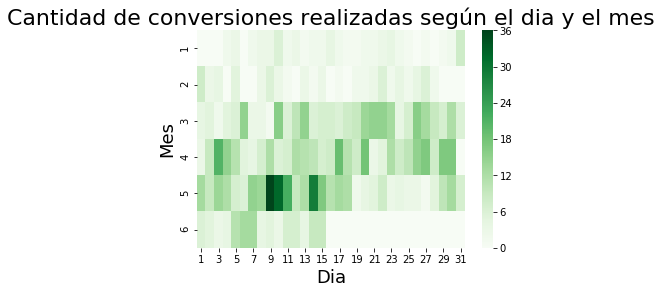

In [61]:
for_heatmap = ConteoDeConversiones.pivot_table(index = 'mes', columns = 'dia', values = 'conversion').fillna(0)
g = sns.heatmap(for_heatmap,  cmap="Greens")
g.set_title("Cantidad de conversiones realizadas según el dia y el mes", fontsize=22)
g.set_xlabel("Dia",fontsize=18)
g.set_ylabel("Mes", fontsize=18)
for_heatmap

Tambien podría ser interesante observar cómo se distribuye la cantidad de usuarios en todos los events según el mes.

Para realizar este análisis debo agregar al dataframe que contiene los conteos una columna adicional que sea la suma del total de personas en todos los eventos para cada mes. Con estos valores creo una pivot table con los meses como índice y los dias como columnas.

In [75]:
conteo['pers_en_event'] = conteo.filter(items = ['ad campaign hit', 'brand listing','checkout', 'conversion', 'generic listing','lead', 'search engine hit', 'searched products', 'staticpage', 'viewed product', 'visited site']).sum(axis = 1)
conteoTotal = conteo.groupby(['mes', 'dia']).sum().reset_index()
conteoTotal.head()

event,mes,dia,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site,pers_en_event
0,1,1,5.0,0.0,0.0,0.0,6.0,0.0,2.0,3.0,0.0,6.0,7.0,29.0
1,1,2,20.0,45.0,5.0,0.0,36.0,0.0,20.0,10.0,0.0,122.0,20.0,278.0
2,1,3,34.0,76.0,3.0,0.0,15.0,1.0,23.0,5.0,4.0,263.0,30.0,454.0
3,1,4,43.0,51.0,9.0,2.0,29.0,0.0,24.0,33.0,0.0,250.0,35.0,476.0
4,1,5,48.0,79.0,8.0,3.0,38.0,0.0,27.0,24.0,3.0,510.0,49.0,789.0


dia,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
mes,,,,,,,,,,,,,,,,,,,,,
1,29.0,278.0,454.0,476.0,789.0,308.0,376.0,460.0,739.0,756.0,...,869.0,833.0,747.0,471.0,698.0,767.0,537.0,701.0,761.0,761.0
2,743.0,754.0,663.0,703.0,960.0,798.0,837.0,651.0,694.0,687.0,...,1205.0,1590.0,884.0,852.0,1455.0,1724.0,1635.0,NaN,NaN,NaN
3,1371.0,1553.0,1424.0,1148.0,1769.0,2618.0,1647.0,2111.0,1755.0,2160.0,...,3928.0,3208.0,2562.0,2451.0,3298.0,3887.0,3473.0,3975.0,2728.0,2057.0
4,1964.0,3716.0,4732.0,4132.0,4484.0,4028.0,3191.0,2204.0,3949.0,4606.0,...,2606.0,4640.0,4686.0,5697.0,6435.0,6818.0,5569.0,4736.0,6651.0,NaN
5,6349.0,7703.0,8232.0,7825.0,7493.0,6787.0,8828.0,10104.0,10564.0,12131.0,...,22202.0,19320.0,17484.0,17022.0,13917.0,13057.0,19170.0,23138.0,23341.0,20862.0


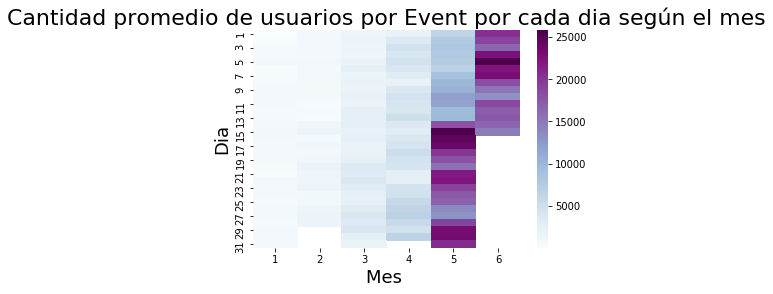

In [76]:
totalPerPorEvent = conteoTotal.pivot_table(index = 'mes', columns = 'dia', values = 'pers_en_event')
g = sns.heatmap(new,  cmap="BuPu", )
g.set_title("Cantidad promedio de usuarios por Event por cada dia según el mes", fontsize=22)
g.set_xlabel("Mes ",fontsize=18)
g.set_ylabel("Dia", fontsize=18)
totalPerPorEvent.head()

**Quiero ver la densidad de la cantidad de visitas al sitio, a través de una campaña de marketing, en el tiempo.**

In [88]:
conteo.head()

event,timestamp,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site,mes,dia,pers_en_event
0,2018-01-01 07:32:26,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1,4.0
1,2018-01-01 09:51:51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1.0
2,2018-01-01 09:51:53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1.0
3,2018-01-01 12:40:21,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,2.0
4,2018-01-01 12:41:07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1.0


In [108]:
conteoTotal['cant ad campaign hit log'] = np.log(conteoTotal['ad campaign hit'])
conteoTotal.head()

event,mes,dia,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site,pers_en_event,ad campaign hit log,cant ad campaign hit log,cant ad campaign hit log
0,1,1,5.0,0.0,0.0,0.0,6.0,0.0,2.0,3.0,0.0,6.0,7.0,29.0,1.609438,1.609438,1.609438
1,1,2,20.0,45.0,5.0,0.0,36.0,0.0,20.0,10.0,0.0,122.0,20.0,278.0,2.995732,2.995732,2.995732
2,1,3,34.0,76.0,3.0,0.0,15.0,1.0,23.0,5.0,4.0,263.0,30.0,454.0,3.526361,3.526361,3.526361
3,1,4,43.0,51.0,9.0,2.0,29.0,0.0,24.0,33.0,0.0,250.0,35.0,476.0,3.761200,3.761200,3.761200
4,1,5,48.0,79.0,8.0,3.0,38.0,0.0,27.0,24.0,3.0,510.0,49.0,789.0,3.871201,3.871201,3.871201


/home/soledad-escobar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Densidad')

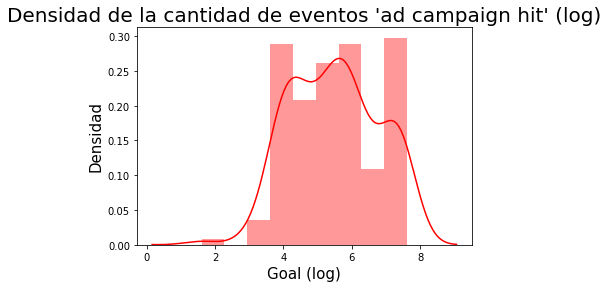

In [122]:
adCampaignHitDensity = sns.distplot(conteoTotal['cant ad campaign hit log'], color='red')
adCampaignHitDensity.set_title("Densidad de la cantidad de eventos 'ad campaign hit' (log)", fontsize=20)
adCampaignHitDensity.set_xlabel("Goal (log)",fontsize=15)
adCampaignHitDensity.set_ylabel("Densidad", fontsize=15)

In [125]:
conteoTotal['cant visited site log'] = np.log(conteoTotal['visited site'])

/home/soledad-escobar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Densidad')

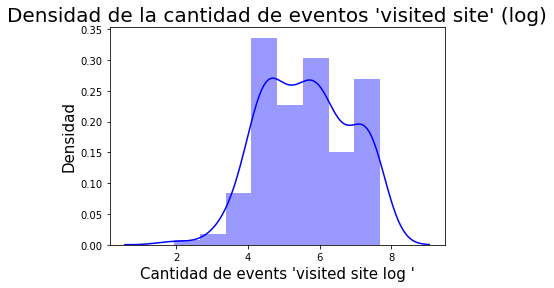

In [127]:
visitedSiteHist = sns.distplot(conteoTotal['cant visited site log'], color = 'blue')
visitedSiteHist.set_title("Densidad de la cantidad de eventos 'visited site' (log)", fontsize=20)
visitedSiteHist.set_xlabel("Cantidad de events 'visited site log '",fontsize=15)
visitedSiteHist.set_ylabel("Densidad", fontsize=15)

/home/soledad-escobar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/soledad-escobar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribución superpuesta de ad campaign hit y visited site')

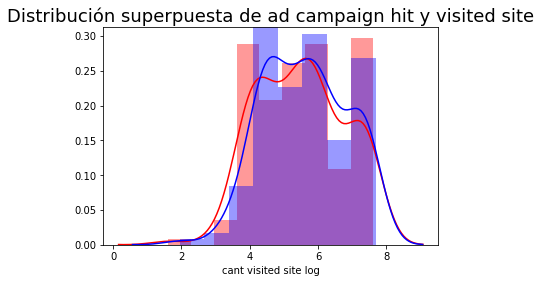

In [128]:
comparacion = sns.distplot(conteoTotal['cant ad campaign hit log'], color='red', label='ad campaign hit (log)')
comparacion = sns.distplot(conteoTotal['cant visited site log'], color='blue', label='visited site (log)')
comparacion.set_title("Distribución superpuesta de ad campaign hit y visited site", fontsize=18)